In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from joblib import Parallel, delayed
from wordcloud import WordCloud

In [ ]:
from PIL import ImageFont, ImageDraw, Image

font = ImageFont.truetype("arial.ttf", 24)  

image = Image.new("RGB", (50, 50), "white")
draw = ImageDraw.Draw(image)

draw.text((10, 10), "∀", font=font, fill="black")

char_size = draw.textsize("∀", font=font)

print("∀ symbol's width in pixels:", char_size[0])
print("∀ symbol's height in pixels:", char_size[1])

bbox = draw.textbbox((10, 10), "∀", font=font)
print(bbox[2] - bbox[0], bbox[3] - bbox[1])

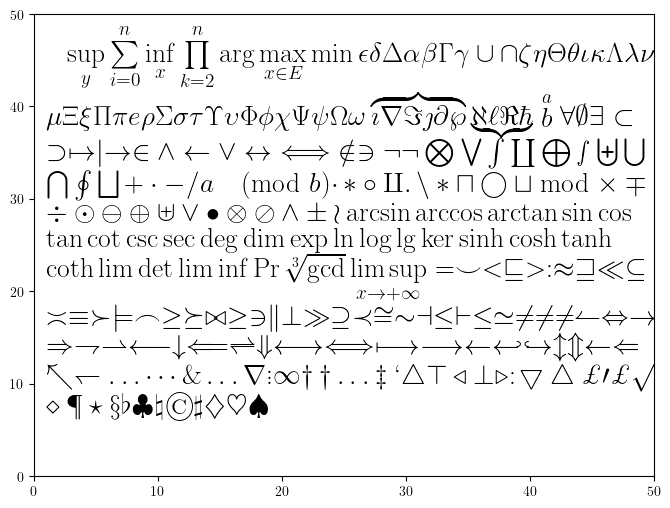

In [14]:
# mpl.use("pgf")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     # "text.latex.preamble": "\n".join([
#     #      r"\usepackage{unicode-math}",  
#     #      r"\usepackage{geometry}", 
#     # ])
# })
plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

ax.text(1, 45, 
        r"$\sup\limits_{y} \sum\limits_{i=0}^n \inf\limits_x \prod\limits_{k=2}^n \arg\max\limits_{x\in E} \min \epsilon \delta \Delta \alpha \beta \Gamma "
        r"\gamma \cup \cap \zeta \eta \Theta \theta \iota \kappa \Lambda \lambda \nu \\ \mu \Xi \xi \Pi \pi e \rho \Sigma \sigma \tau \Upsilon \upsilon \Phi "
        r"\phi \chi \Psi \psi \Omega \omega \overbrace{\imath \nabla \Im \jmath \partial \wp} \underbrace{\aleph \ell \Re \hbar} \stackrel{a}{b} \forall "
        r"\emptyset \exists \subset \empty \\ \supset \mapsto \mid \to \in \land \gets \lor \leftrightarrow \iff \notin \ni \neg \lnot \bigotimes \bigvee "
        r"\int \coprod \bigoplus \smallint \biguplus \bigcup \\ \bigcap \oint \bigsqcup + \cdot - / a \pmod b \cdotp * \circ \amalg \ldotp \setminus \ast "
        r"\sqcap \bigcirc \sqcup \bmod \times \mp \\ \div \odot \ominus \oplus \uplus \vee \bullet \otimes \oslash \wedge \pm \wr \arcsin \arccos \arctan "
        r"\sin \cos \\ \tan \cot \csc \sec \deg \dim \exp \ln \log \lg \ker \sinh \cosh \tanh \\ \coth \lim \det \liminf \Pr \sqrt[3]{\gcd} \limsup\limits_{x\to +\infty} "
        r"= \smile < \sqsubseteq > : \approx \sqsupseteq \ll \subseteq \\ \asymp \equiv \succ \models \frown \ge \succeq \bowtie \geq \owns \parallel \perp "
        r"\gg \supseteq \prec \cong \sim \dashv \le \vdash \leq \simeq \not = \ne \neq \leftharpoonup \Leftrightarrow \rightarrow \\ \Rightarrow \rightharpoondown "
        r"\rightharpoonup \longleftarrow \downarrow \Longleftarrow \rightleftharpoons \Downarrow \longleftrightarrow \Longleftrightarrow \longmapsto \longrightarrow "
        r"\gets \hookleftarrow \hookrightarrow \updownarrow \Updownarrow \leftarrow \Leftarrow \\ \nwarrow \leftharpoondown \dots \cdots \& \ldots \nabla \vdots "
        r"\infty \dag \dagger \mathellipsis \ddagger \lq \triangle \top \triangleleft \bot \triangleright \colon \bigtriangledown \bigtriangleup \pounds \prime "
        r"\mathsterling \surd \\ \diamond \P \star \S \flat \clubsuit \natural \copyright \sharp \diamondsuit \heartsuit \spadesuit$", fontsize=20)
# fig.tight_layout(pad=.5)
plt.show()


In [ ]:
# mpl.rcParams.update({'text.usetex': True})
# plt.rcParams.update({
#     "font.family": "STIXGeneral",
#     'mathtext.fontset': 'stix',
#     'mathtext.default': 'it',
#     'mathtext.bf': 'it:bold',
# })
plt.rcParams.update({
    'font.sans-serif': 'Arial Unicode MS',
    # 'font.family': "Times New Roman"
    'mathtext.fontset': 'stix',
    'mathtext.default': 'it',
    'mathtext.bf': 'it:bold',
})
text = r"α β γ"  # your words for wordcloud
word_freq = {'α': 100, 'β': 80, 'γ': 60, "ζ": 50, "∑": 90, "π": 85, "e": 76, "inf": 30}  # words frequancy

wc = WordCloud(width=960, height=720, background_color='white', mask=None, contour_color='steelblue').generate_from_frequencies(word_freq)
print(wc.layout_)
print(*wc.layout_[0][2], wc.layout_[0][0][0], wc.layout_[0][1], 
      tuple(map(lambda x: int(x) / 255, wc.layout_[0][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
      90 if wc.layout_[0][3] is not None else 0)

# plt.figure(figsize=(9.6, 7.2))
# plt.xlim((0, 960))
# plt.ylim((0, 720))
# plt.text(*wc.layout_[0][2], fr"{wc.layout_[0][0][0]}", 
#          fontsize=wc.layout_[0][1], 
#          color=tuple(map(lambda x: int(x) / 255, wc.layout_[0][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
#          rotation=90 if wc.layout_[0][3] is not None else 0)
# plt.text(*wc.layout_[1][2], fr"{wc.layout_[1][0][0]}", 
#          fontsize=wc.layout_[1][1], 
#          color=tuple(map(lambda x: int(x) / 255, wc.layout_[1][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
#          rotation=90 if wc.layout_[1][3] is not None else 0)
# plt.text(*wc.layout_[2][2], fr"{wc.layout_[2][0][0]}", 
#          fontsize=wc.layout_[2][1], 
#          color=tuple(map(lambda x: int(x) / 255, wc.layout_[2][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
#          rotation=90 if wc.layout_[2][3] is not None else 0)

# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

tex_words = (r"\sup \sum \inf \prod \arg \max \min \epsilon \delta \Delta \alpha \beta \Gamma \gamma \cup \cap \zeta \eta \Theta \theta "
             r"\iota \kappa \Lambda \lambda \nu \mu \Xi \xi \Pi \pi e \rho \Sigma \sigma \tau \Upsilon \upsilon \Phi \phi \chi \Psi \psi "
             r"\Omega \omega \imath \nabla \Im \jmath \partial \wp \aleph \ell \Re \hbar \forall \emptyset \exists \subset \empty \supset "
             r"\mapsto \mid \to \in \land \gets \lor \leftrightarrow \iff \notin \ni \neg \lnot \bigotimes \bigvee \int \coprod \bigoplus "
             r"\smallint \biguplus \bigcup \bigcap \oint \bigsqcup + \cdot - / \pmod \cdotp * \circ \amalg \ldotp \setminus \ast \sqcap "
             r"\bigcirc \sqcup \bmod \times \mp \div \odot \ominus \oplus \uplus \vee \bullet \otimes \oslash \wedge \pm \wr \arcsin "
             r"\arccos \arctan \sin \cos \tan \cot \csc \sec \deg \dim \exp \ln \log \lg \ker \sinh \cosh \tanh \coth \lim \det \liminf "
             r"\Pr \gcd \limsup = \smile < \sqsubseteq > : \approx \sqsupseteq \ll \subseteq \asymp \equiv \succ \models \frown \ge "
             r"\succeq \bowtie \geq \owns \parallel \perp \gg \supseteq \prec \cong \sim \dashv \le \vdash \leq \simeq \not = \ne \neq "
             r"\leftharpoonup \Leftrightarrow \rightarrow \Rightarrow \rightharpoondown \rightharpoonup \longleftarrow \downarrow "
             r"\Longleftarrow \rightleftharpoons \Downarrow \longleftrightarrow \Longleftrightarrow \longmapsto \longrightarrow \gets "
             r"\hookleftarrow \hookrightarrow \updownarrow \Updownarrow \leftarrow \Leftarrow \nwarrow \leftharpoondown \dots \cdots \& "
             r"\ldots \nabla \vdots \infty \dag \dagger \mathellipsis \ddagger \lq \triangle \top \triangleleft \bot \triangleright "
             r"\colon \bigtriangledown \bigtriangleup \pounds \prime \mathsterling \surd \diamond \P \star \S \flat \clubsuit \natural "
             r"\copyright \sharp \diamondsuit \heartsuit \spadesuit")

# unicode_words = ("∃ ! ∀ ∅ ε δ ∏ ∑ ∏ Δ α β Γ γ ζ η Θ θ ι κ Λ λ ν μ Ξ ξ Π π e ρ Σ σ τ Υ υ Φ φ χ Ψ ψ Ω ω 𝘭 ∇ ℑ 𝚥 ∂ ℕ ℤ ℚ ℝ ℂ "
#          "℘ א ℓ ħ ⊂ ⊃ ↦ ∣ → ∈ ∧ ← ∨ ↔ ⟹ ⟸ ⟺ ∉ ∋ ¬ ⊗ ⋁ ⋃ ⋂ ∫ ∬ ∭ ∮ ∯ ∰ ∱ ∲ ∳ ∐ ⊕ ⨄ ⨆ + ⋅ - / ⋅ * ∘ ⨿ . ∖ ∗ ⊓ ◯ ⊔ mod "
#          "∓ ÷ ⊙ ⊖ ⊕ ⊎ ∨ ∙ ⊗ ⊘ ∧ ± ≀ sup inf arg max min arcsin arccos arctan sin cos tan cot csc sec deg dim exp ln log lg ker sinh cosh tanh coth lim "
#          "det liminf Pr gcd limsup = ⌣ < ⊑ > : ≈ ⊒ ≪ ⊆ ≍ ≡ ≻ ⊨ ⌢ ≥ ⪰ ⋈ ∥ ⊥ ≫ ⊇ ≺ ≅ ∼ ⊣ ≤ ⊢ ≃ ≠ ↼ ⇔ → ⇒ ⇁ ⇀ ⟵ ↓ ⟸ ⇌ ⇓ ⟷ ⟺ "
#          "⟼ ⟶ ← ↩ ↪ ↕ ⇕ ← ⇐ ↖ ↽ … ⋯ & ⋮ ∞ † † ‡ △ ■ ⊤ ◃ ⊥ ▹ : ▽ △ £ √ § ♭ ♮ ♯")
unicode_words = ("ε δ ∏ ∑ ∏ Δ α β Γ γ ζ η Θ θ ι κ Λ λ ν μ Ξ ξ Π π e ρ Σ σ τ Υ υ Φ φ χ Ψ ψ Ω ω 0 1 2 3 4 5 6 7 8 9 сущ 𝘭 ∇ ℑ 𝚥 ∂ ℕ ℤ ℚ ℝ ℂ "
         "℘ א ℓ ħ ⊂ ⊃ ∣ ∈ ∧ ∨ ∉ ∋ ¬ ⊗ ⋁ ⋃ ⋂ ∫ ∐ ⊕ ⨄ ⨆ + ⋅ - / ⋅ * ∘ ⨿ . ∖ ∗ ⊓ ◯ ⊔ mod "
         "∓ ÷ ∧ ± ≀ sup inf arg max min arcsin arccos arctan sin cos tan cot csc sec deg dim exp ln log lg ker sinh cosh tanh coth lim "
         "det liminf Pr gcd limsup = ⊙ ⊖ ⊕ ⊎ ∨ ∙ ⊗ ⊘ ⌣ < ⊑ > : ≈ ⊒ ≪ ⊆ ≍ ≡ ≻ ⊨ ⌢ ≥ ⪰ ⋈ ∥ ⊥ ≫ ⊇ ≺ ≅ ∼ ⊣ ≤ ⊢ ≃ ≠ & ∞ † † ‡ △ ■ ⊤ ⊥ ▽ △ £ √ §")

# plt.figure(figsize=(9.6, 7.2))
# plt.xlim((0, 1600))
# plt.ylim((0, 400))
# plt.text(10, 10, unicode_words, fontsize=80)
# plt.show()
# plt.close()

# tex_words = " ".join("$" + w + "$" for w in tex_words.split())
# unicode_words = {s: abs(round(np.random.normal(50, 25, 1)[0])) % 100 for s in unicode_words.split() + ["a (mod b)"]}
# print(sorted(unicode_words.items(), key=lambda x: x[1], reverse=True))

print(list(zip(unicode_words.split() + ["a (mod b)"], sorted(np.random.normal(50, 25, unicode_words.count(' ') + 2), key=lambda x: -x))))
if not os.path.exists('wframes'):
    os.mkdir('wframes')

# plt.figure(figsize=(9.6, 7.2))
# plt.rc('text', usetex=True)
# mpl.rcParams.update({'text.usetex': True})
freq = {s: abs(round(p)) for s, p in zip(unicode_words.split() + ["a (mod b)"], 
                                                                             sorted(np.random.normal(50, 25, unicode_words.count(' ') + 3), 
                                                                                    key=lambda x: -abs(x)))}
def gen_frame_from_frequancies(frame_name, word_freq):
    # gen_frame(frame, words)
    mask = np.array(Image.open("frames/" + frame_name))
    plt.figure(figsize=(9.6, 7.2))
    plt.subplots_adjust(0, 0, 1, 1)
    try:
        wc = WordCloud(width=960, height=720, background_color="white", mask=mask, 
                       contour_width=1, scale=1, contour_color='white',
                       color_func=lambda word, font_size, position,
                                         orientation, random_state=None,
                                         **kwargs: "rgb(0, 0, 0)")
        wc.generate_from_frequencies(word_freq)
        # wc.layout_[0] = tuple(list(wc.layout_[0][:3]) + [Image.ROTATE_180, wc.layout_[0][4]])
        # wc.layout_[2] = tuple(list(wc.layout_[2][:3]) + [Image.ROTATE_180, wc.layout_[2][4]])
        # print(wc.layout_[:5])

        plt.imshow(wc, interpolation='bilinear')

        # plt.xlim((0, 960))
        # plt.ylim((0, 720))
        # for i in range(len(wc.layout_)):
        #     plt.text(*wc.layout_[i][2], fr"{wc.layout_[i][0][0]}", 
        #     fontsize=wc.layout_[i][1], 
        #     color=tuple(map(lambda x: int(x) / 255, wc.layout_[i][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
        #     rotation=90 if wc.layout_[i][3] is not None else 0)
    except ValueError:
        shutil.copy('frames/' + frame_name, 'wframes')
        print('Empty file was processed')
        plt.close()
        return
    
    # plt.xlim((0, 960))
    # plt.ylim((0, 720))
    # for i in range(len(wc.layout_)):
    #     plt.text(*wc.layout_[i][2], fr"{wc.layout_[i][0][0]}", 
    #              fontsize=wc.layout_[i][1], 
    #              color=tuple(map(lambda x: int(x) / 255, wc.layout_[i][4][wc.layout_[0][4].index('(') + 1:-1].split(', '))), 
    #              rotation=90 if wc.layout_[i][3] is not None else 0)
    #     print(f"{i + 1}'s symbols from {len(wc.layout_)}")
    
    plt.axis("off")
    plt.savefig('wframes/' + frame_name)
    # prev_mask = mask.copy()
    print(frame_name, 'is done')
    plt.close()

Parallel(n_jobs=-1)(delayed(gen_frame_from_frequancies)(
    frame, 
    {
        s: abs(round(p)) for s, p in zip(unicode_words.split() + ["a (mod b)"], 
                                         sorted(np.random.normal(50, 25, unicode_words.count(' ') + 2), 
                                                key=lambda x: -abs(x)))
    }
) for frame in os.listdir('frames'))
